In [1]:
# Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score , accuracy_score
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [2]:
data = pd.read_csv(r"D:\Visual Studio Code\ML\DataSet\insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.shape

(1338, 7)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
data['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [6]:
data.replace({'sex':{'male':0,'female':1},'smoker':{'yes':0,'no':1},'region':{'southeast':0,'southwest':1,'northwest':2,'northeast':3},},inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9412\2320603879.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'sex':{'male':0,'female':1},'smoker':{'yes':0,'no':1},'region':{'southeast':0,'southwest':1,'northwest':2,'northeast':3},},inplace=True)


sex -male = 0 ,female = 1

smoker - yes = 1, no = 0

region - southeast = 0, southwest = 1, northwest =2, northeast = 3

In [7]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520


In [8]:
data.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.795217,1.455157,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.130197,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,1.000000,0.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,1.000000,1.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,1.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


C:\Users\Administrator\AppData\Local\Temp\ipykernel_9412\2410967234.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'])


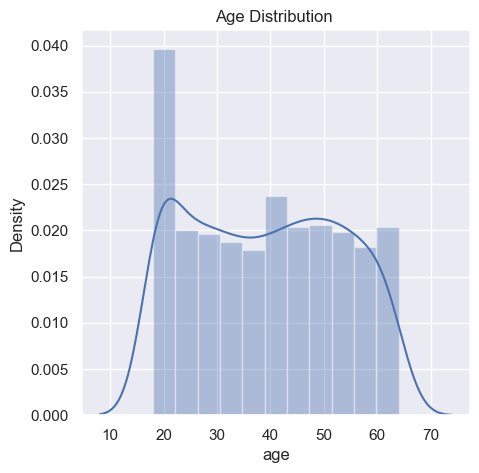

In [9]:
#Distribution of age value

sns.set()
plt.figure(figsize=(5,5))
sns.distplot(data['age'])
plt.title('Age Distribution ')
plt.show()

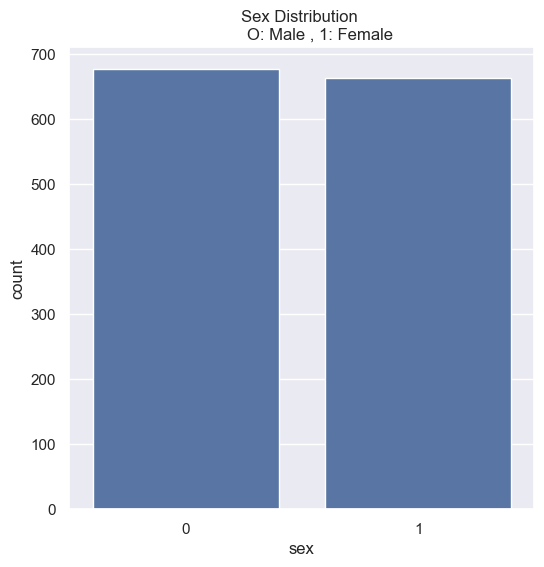

In [10]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data= data)
plt.title('''Sex Distribution 
        O: Male , 1: Female''')
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9412\3701878655.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['bmi'])


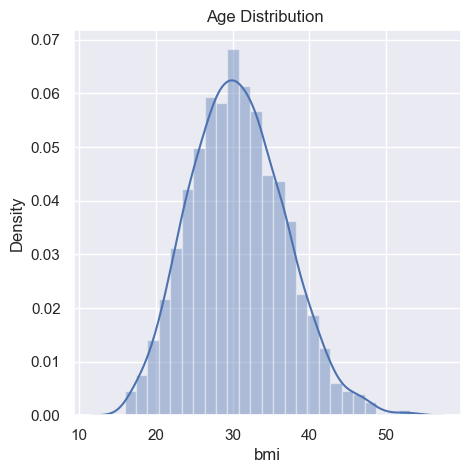

In [11]:
sns.set()
plt.figure(figsize=(5,5))
sns.distplot(data['bmi'])
plt.title('Age Distribution ')
plt.show()

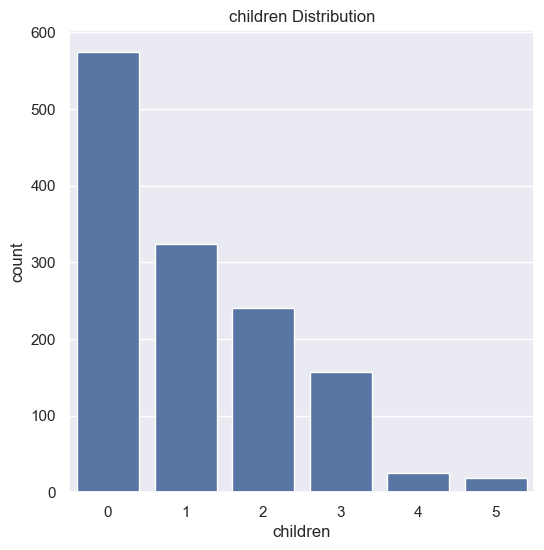

In [12]:
plt.figure(figsize=(6,6))
sns.countplot(x='children', data= data)
plt.title('children Distribution' )
plt.show()

In [13]:
data['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

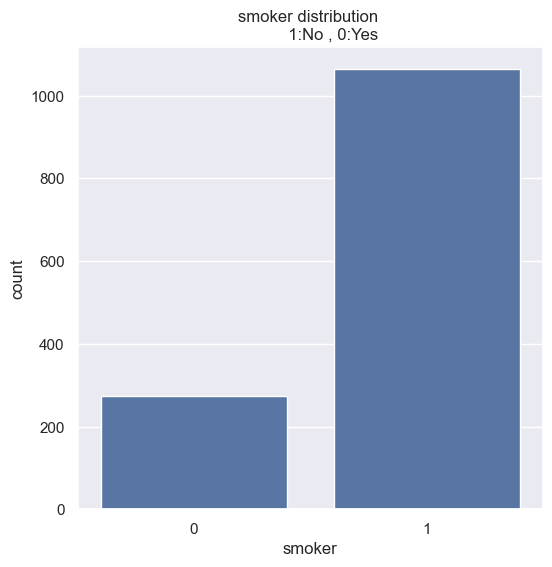

In [14]:
#Smoker distribution 
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data= data)
plt.title('''smoker distribution 
          1:No , 0:Yes''')
plt.show()

In [15]:
data['smoker'].value_counts()

smoker
1    1064
0     274
Name: count, dtype: int64

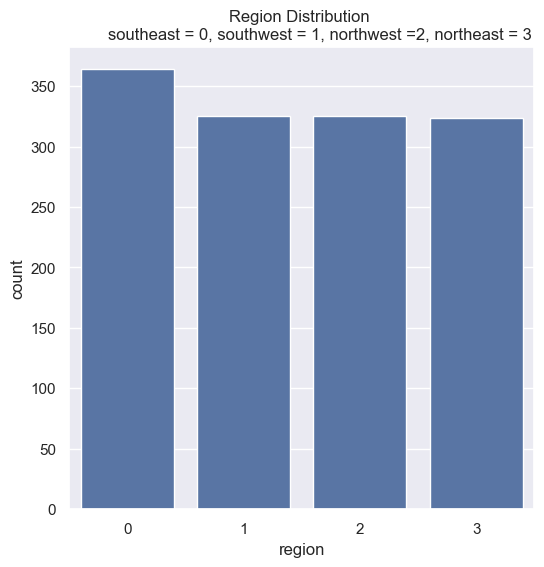

In [16]:
#Region distribution 
plt.figure(figsize=(6,6))
sns.countplot(x='region', data= data)
plt.title('''Region Distribution 
        southeast = 0, southwest = 1, northwest =2, northeast = 3''')
plt.show()

In [17]:
data['region'].value_counts()

region
0    364
1    325
2    325
3    324
Name: count, dtype: int64

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9412\874754082.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['charges'])


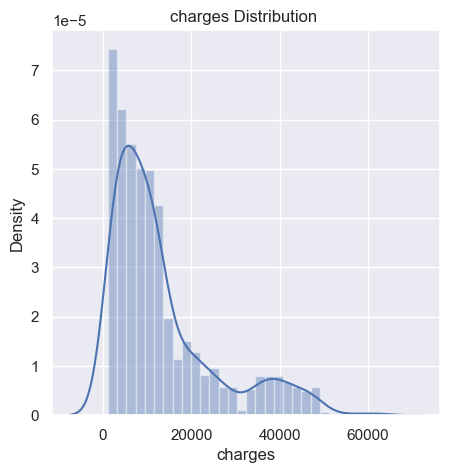

In [18]:
sns.set()
plt.figure(figsize=(5,5))
sns.distplot(data['charges'])
plt.title('charges Distribution ')
plt.show()

In [19]:
#Splitting the feature and target 
x = data.drop(columns='charges',axis=1)
y=data['charges']

In [20]:
print(x)
print(y)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       2
4      32    0  28.880         0       1       2
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       2
1334   18    1  31.920         0       1       3
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       2

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [21]:
#Splitting the data in training and testing data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [22]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [23]:
#Checking the model [Model Evaluation]

training_pred = regressor.predict(x_train)
error = r2_score(y_train,training_pred)
print(("Error in data: ",error))

('Error in data: ', 0.7518195459072954)


In [24]:
#Checking the model [Model Evaluation]

testing_pred = regressor.predict(x_test)
error = r2_score(y_test,testing_pred)
print(("Error in data: ",error))

('Error in data: ', 0.7454471618659975)


In [25]:
#Predictiong model

dat =(32,0,28.88,0,1,3)
dat = np.asarray(dat)
dat = dat.reshape(1,-1)
pred = regressor.predict(dat)
print(pred)


[5765.74259399]


c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
